In [75]:
library(survival)

## Appropriate data manipulations

In [83]:
dat <- read.csv("diabeticVision.csv")
dat$trt = factor(dat$trt)
dat$laser = factor(dat$laser)
dat$type = factor(dat$type)
dat$group = factor(dat$group)
dat

X,id,laser,eye,age,type,trt,futime,status,risk,group
<int>,<int>,<fct>,<chr>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>
1,5,argon,left,28,adult,1,46.23,0,9,2
2,5,argon,left,28,adult,0,46.23,0,9,0
3,14,argon,right,12,juvenile,1,42.50,0,8,2
4,14,argon,right,12,juvenile,0,31.30,1,6,0
5,16,xenon,right,9,juvenile,1,42.27,0,11,3
6,16,xenon,right,9,juvenile,0,42.27,0,11,1
7,25,argon,left,9,juvenile,1,20.60,0,11,2
8,25,argon,left,9,juvenile,0,20.60,0,11,0
9,29,xenon,left,13,juvenile,1,38.77,0,9,3


In [28]:
levels(dat$group)

[1] "0" "1" "2" "3"

## Kaplan-Meier Curves and Log Rank

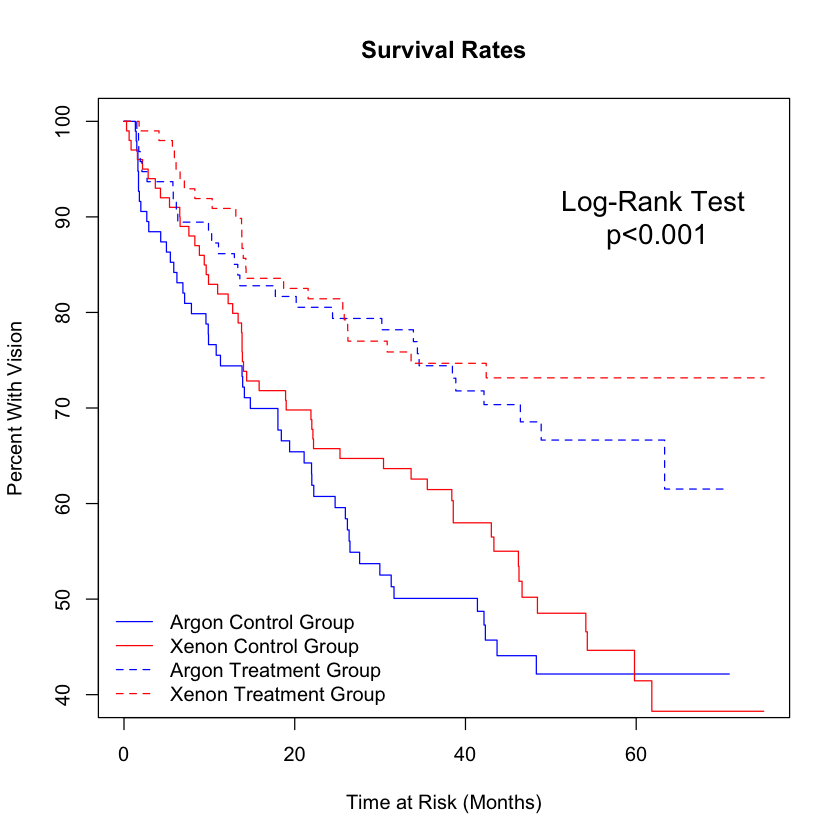

In [76]:
survobj <- with(dat, Surv(futime, status))

# ph$compas <- cut(ph$decile_score, breaks=c(0,3,6,10))
fitc <- survfit(survobj~group, data=dat)
plot(fitc, xlab="Time at Risk (Months)", 
   ylab="Percent With Vision", yscale=100, ylim=c(1, 0.4),
   main="Survival Rates",
   col = c('blue', 'red', 'blue', 'red'),
   lty = c('solid', 'solid', 'dashed', 'dashed')
)
legend_text = c('Argon Control Group', 'Xenon Control Group', 'Argon Treatment Group', 'Xenon Treatment Group')
legend('bottomleft', legend=legend_text, bty='n',
       col=c('blue', 'red', 'blue', 'red'), lty=c('solid', 'solid', 'dashed', 'dashed'))
text(62, 0.9, 'Log-Rank Test\n p<0.001', cex=1.4)

In [6]:
dat$group = relevel(dat$group, ref="2")

In [77]:
finalfit(dat, "Surv(futime, status)", c("trt*laser", "age", "risk", "frailty(id)"))

,"Dependent: Surv(futime, status)",,all,HR (univariable),HR (multivariable)
,<chr>,<chr>,<chr>,<chr>,<chr>
8,trt,0,197 (50.0),-,-
9,,1,197 (50.0),-,-
3,laser,argon,194 (49.2),-,-
4,,xenon,200 (50.8),"0.85 (0.57-1.25, p=0.412)","0.75 (0.46-1.22, p=0.247)"
1,age,Mean (SD),20.8 (14.8),"1.00 (0.99-1.01, p=0.604)","1.01 (0.99-1.02, p=0.358)"
5,risk,Mean (SD),9.7 (1.5),"1.16 (1.04-1.29, p=0.009)","1.19 (1.03-1.36, p=0.014)"
2,frailty(id),,,-,-
6,NA,NA,NA,"0.47 (0.30-0.74, p=0.001)","0.38 (0.24-0.62, p<0.001)"
7,trt:laserxenon,Interaction,NA,"0.95 (0.49-1.83, p=0.869)","1.07 (0.54-2.11, p=0.854)"


In [21]:
finalfit(dat, "Surv(futime, status)", c("risk"))

,"Dependent: Surv(futime, status)",,all,HR (univariable),HR (multivariable)
,<chr>,<chr>,<chr>,<chr>,<chr>
1,risk,Mean (SD),9.7 (1.5),"1.16 (1.04-1.29, p=0.009)","1.16 (1.04-1.29, p=0.009)"


## Interpret coefficients of Interaction Term

In [84]:
summary(coxph(survobj~trt*laser + age + risk + frailty(id), data=dat))

Call:
coxph(formula = survobj ~ trt * laser + age + risk + frailty(id), 
    data = dat)

  n= 394, number of events= 155 

                coef      se(coef) se2      Chisq  DF   p      
trt1            -0.954928 0.243161 0.238255  15.42  1.0 8.6e-05
laserxenon      -0.291249 0.251438 0.204767   1.34  1.0 2.5e-01
age              0.006777 0.007375 0.005625   0.84  1.0 3.6e-01
risk             0.169901 0.069378 0.059500   6.00  1.0 1.4e-02
frailty(id)                                 107.86 79.5 1.9e-02
trt1:laserxenon  0.064234 0.348640 0.342208   0.03  1.0 8.5e-01

                exp(coef) exp(-coef) lower .95 upper .95
trt1               0.3848     2.5985    0.2389    0.6198
laserxenon         0.7473     1.3381    0.4565    1.2233
age                1.0068     0.9932    0.9924    1.0215
risk               1.1852     0.8437    1.0345    1.3578
trt1:laserxenon    1.0663     0.9378    0.5384    2.1118

Iterations: 6 outer, 31 Newton-Raphson
     Variance of random effect= 0.7990444   I

## Model without Interaction Term

In [79]:
summary(coxph(survobj~group + age + risk + frailty(id), data=dat))

Call:
coxph(formula = survobj ~ group + age + risk + frailty(id), data = dat)

  n= 394, number of events= 155 

            coef      se(coef) se2      Chisq  DF   p      
group1      -0.291249 0.251438 0.204767   1.34  1.0 2.5e-01
group2      -0.954928 0.243161 0.238255  15.42  1.0 8.6e-05
group3      -1.181943 0.288699 0.250297  16.76  1.0 4.2e-05
age          0.006777 0.007375 0.005625   0.84  1.0 3.6e-01
risk         0.169901 0.069378 0.059500   6.00  1.0 1.4e-02
frailty(id)                             107.86 79.5 1.9e-02

       exp(coef) exp(-coef) lower .95 upper .95
group1    0.7473     1.3381    0.4565    1.2233
group2    0.3848     2.5985    0.2389    0.6198
group3    0.3067     3.2607    0.1742    0.5400
age       1.0068     0.9932    0.9924    1.0215
risk      1.1852     0.8437    1.0345    1.3578

Iterations: 6 outer, 31 Newton-Raphson
     Variance of random effect= 0.7990444   I-likelihood = -846.8 
Degrees of freedom for terms=  2.5  0.6  0.7 79.5 
Concordance= 0.838  

In [14]:
library(finalfit)
# install.packages("finalfit")